In [277]:
import math
import datetime
from datetime import datetime
import json
from pymongo import MongoClient
import dbQueries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from collections import Counter
sns.set()

In [278]:
plt.style.use('seaborn-notebook')


In [279]:
# Display results per genre
re_json = dbQueries.getTopGenres(10)
df_topGenres = pd.DataFrame.from_dict(re_json)
df_topGenres.head()


,genres,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgRevenue
0,Drama,81.121,1169,11.676,8.638,1574308.010,3911999.482
1,Documentary,110.208,1054,2.223,9.383,4910.930,22916.507
2,Comedy,67.746,760,17.191,8.658,2337151.226,4024125.428
3,Music,70.907,529,6.365,9.453,549995.849,1135669.070
4,Romance,88.394,325,13.211,8.599,830369.923,2699984.206


In [280]:
df_topGenres.shape

(10, 7)

In [281]:
df_topGenres.describe()

,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgRevenue
count,10.000000,10.000000,10.000000,10.00000,1.000000e+01,1.000000e+01
mean,73.966000,525.400000,21.165000,8.69860,2.355983e+06,4.642771e+06
std,17.432723,347.370823,12.459941,0.41898,2.170878e+06,4.385676e+06
min,45.034000,237.000000,2.223000,8.11500,4.910930e+03,2.291651e+04
25%,64.212000,299.750000,12.059750,8.55925,9.190526e+05,2.243539e+06
50%,72.601500,321.000000,23.342000,8.62650,1.868793e+06,3.899978e+06
75%,80.117250,702.250000,30.569750,8.67075,2.509509e+06,4.491439e+06
max,110.208000,1169.000000,37.374000,9.45300,6.375323e+06,1.511300e+07


In [282]:
# Checking for null values
df_topGenres.isnull().sum()

genres           0
avgRuntime       0
noMovies         0
avgPopularity    0
avgVotes         0
avgBudget        0
avgRevenue       0
dtype: int64

In [283]:
# Checking for duplications
sum(df_topGenres.duplicated())
#df.drop_duplicates(inplace=True)


0

In [284]:
# avgBudget and avgRevenue
# Replace the value of '0' to NaN
df_topGenres[['avgBudget','avgRevenue']] = df_topGenres[['avgBudget','avgRevenue']].replace(0,np.NAN)

df_topGenres.dropna(subset=['avgBudget', 'avgRevenue'], inplace=True)
print('After cleaning, we have {} rows'.format(df_topGenres.shape[0]))

After cleaning, we have 10 rows


In [285]:
# Profits of each movie
df_topGenres['avgProfit'] = df_topGenres['avgRevenue']-df_topGenres['avgBudget']
df_topGenres['avgProfit'] = df_topGenres['avgProfit'].apply(np.int64)
df_topGenres['avgBudget'] = df_topGenres['avgBudget'].apply(np.int64)
df_topGenres['avgRevenue'] = df_topGenres['avgRevenue'].apply(np.int64)
df_topGenres['avgRuntime'] = df_topGenres['avgRuntime'].apply(np.int64)
df_topGenres['avgVotes'] = df_topGenres['avgVotes'].apply(np.int64)

df_topGenres.head()


,genres,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgRevenue,avgProfit
0,Drama,81,1169,11.676,8,1574308,3911999,2337691
1,Documentary,110,1054,2.223,9,4910,22916,18005
2,Comedy,67,760,17.191,8,2337151,4024125,1686974
3,Music,70,529,6.365,9,549995,1135669,585673
4,Romance,88,325,13.211,8,830369,2699984,1869614


In [286]:
df_topGenres.dtypes

genres            object
avgRuntime         int64
noMovies           int64
avgPopularity    float64
avgVotes           int64
avgBudget          int64
avgRevenue         int64
avgProfit          int64
dtype: object

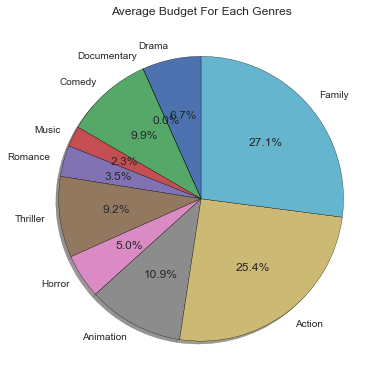

In [243]:
slices = df_topGenres['avgBudget']
labels = df_topGenres['genres']

plt.pie(slices, labels = labels,shadow= True, startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})

plt.title('Average Budget For Each Genres')
plt.tight_layout()
plt.show()

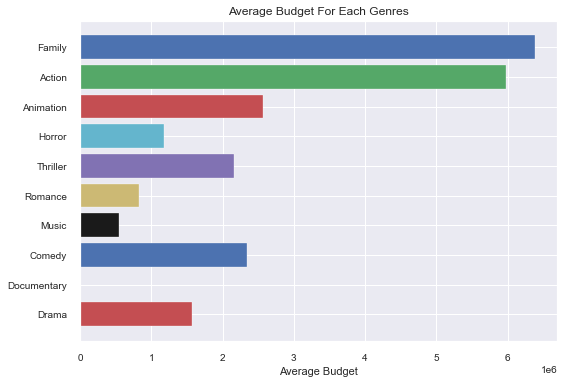

In [287]:
my_colors = 'rgbkymc'
genres = df_topGenres['genres']
avgBudget = df_topGenres['avgBudget']
plt.barh(genres, avgBudget, color= my_colors)

plt.title("Average Budget For Each Genres")
plt.xlabel("Average Budget")    
plt.tight_layout()
plt.show()

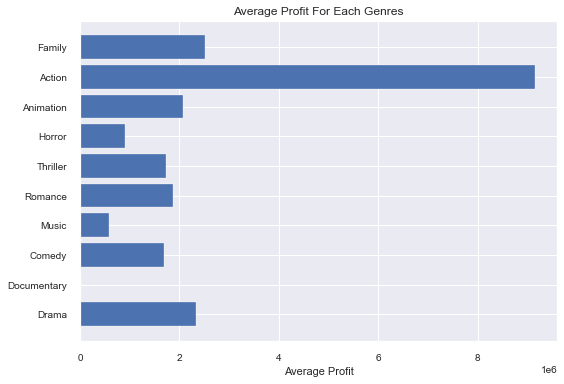

In [288]:

genres = df_topGenres['genres']
avgProfit = df_topGenres['avgProfit']
plt.barh(genres, avgProfit)

plt.title("Average Profit For Each Genres")
plt.xlabel("Average Profit")    
plt.tight_layout()
plt.show()

In [289]:
# Display results per production companies
re_json = dbQueries.getTopProductionCompanies(10)
df_topCompanies = pd.DataFrame.from_dict(re_json)
df_topCompanies.head(5)

,production_companies,noMovies,avgPopularity,avgVotesNo,avgBudget,avgRevenue,avgVotes
0,Universal Pictures,25,52.762,1441.080,2.272000e+07,6.497059e+07,7.448
1,BBC,24,1.944,17.417,1.458333e+06,0.000000e+00,8.571
2,ARTE,22,3.155,70.273,8.540597e+05,1.820788e+06,8.795
3,Canal+,18,10.390,183.278,2.009167e+06,2.024542e+07,7.739
4,Walt Disney Pictures,15,164.935,1476.267,5.826667e+07,3.746845e+07,7.460


In [290]:
#sum(df_topCompanies.duplicated())
#df_topCompanies.isnull().sum()


df_topCompanies[['avgBudget','avgRevenue']] = df_topCompanies[['avgBudget','avgRevenue']].replace(0,np.NAN)

df_topCompanies.dropna(subset=['avgBudget', 'avgRevenue'], inplace=True)
print('After cleaning, we have {} rows'.format(df_topCompanies.shape[0]))


After cleaning, we have 6 rows


In [291]:
# Profits of each movie
df_topCompanies['avgProfit'] = df_topCompanies['avgRevenue']-df_topCompanies['avgBudget']
df_topCompanies['avgProfit'] = df_topCompanies['avgProfit'].apply(np.int64)
df_topCompanies['avgBudget'] = df_topCompanies['avgBudget'].apply(np.int64)
df_topCompanies['avgRevenue'] = df_topCompanies['avgRevenue'].apply(np.int64)
df_topCompanies['avgVotes'] = df_topCompanies['avgVotes'].apply(np.int64)

df_topGenres.head()

,genres,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgRevenue,avgProfit
0,Drama,81,1169,11.676,8,1574308,3911999,2337691
1,Documentary,110,1054,2.223,9,4910,22916,18005
2,Comedy,67,760,17.191,8,2337151,4024125,1686974
3,Music,70,529,6.365,9,549995,1135669,585673
4,Romance,88,325,13.211,8,830369,2699984,1869614


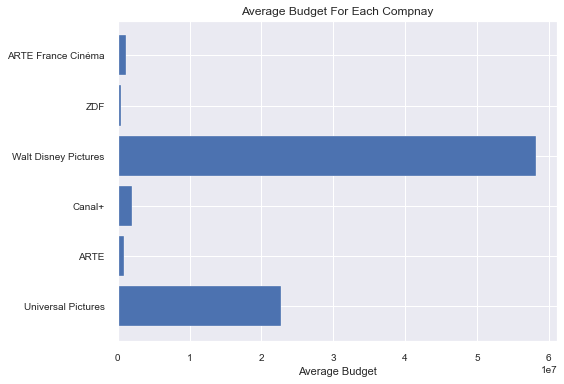

In [292]:
#plt.style.use('fast')
company = df_topCompanies['production_companies']
avgBudget = df_topCompanies['avgBudget']
plt.barh(company, avgBudget)           #Important changing

#plt.xscale('log')
plt.title("Average Budget For Each Compnay")
plt.xlabel("Average Budget")    
plt.tight_layout()
plt.show()

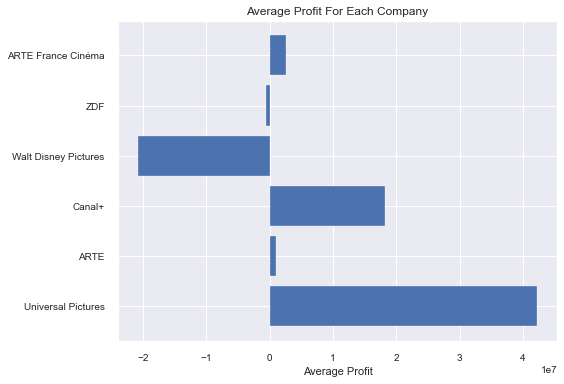

In [182]:
companies = df_topCompanies['production_companies']
avgProfit = df_topCompanies['avgProfit']
plt.barh(companies, avgProfit)

plt.title("Average Profit For Each Company")
plt.xlabel("Average Profit")    
plt.tight_layout()
plt.show()

In [250]:
# Display results per vote average
re_json = dbQueries.getTopVoteAvg(10)
df_topVoted = pd.DataFrame.from_dict(re_json)
df_topVoted.head(5)

,title,genres,budget,popularity,production_companies,production_countries,revenue,runtime,status,vote_avg,vote_count
0,Özallı Yıllar,[Documentary],0,0.600,[],[Turkey],0,422.0,Released,10.0,1
1,Las Vegas,[],0,0.600,[],[United States of America],0,8.0,Released,10.0,1
2,Pare Parvaz,"[Drama, Romance]",0,0.624,[],[Iran],0,97.0,Released,10.0,1
3,Miss Saigon Manila,"[Music, War, Drama]",0,0.600,[],[Philippines],0,145.0,Released,10.0,1
4,Colourful,[Comedy],0,0.600,[],[Japan],0,126.0,Released,10.0,1


In [215]:
# Display results per revenue
re_json = dbQueries.getTopMoreRevenue(10)
df_topMoreRevenue = pd.DataFrame.from_dict(re_json)
df_topMoreRevenue.head(5)

,title,genres,budget,popularity,production_companies,production_countries,revenue,runtime,status,vote_avg,vote_count
0,Брат 2,"[Action, Crime, Drama]",1500000,6.245,"[CTB Film Company, Intercinema Art Agency]","[Russia, United States of America]",1080000,122.0,Released,7.3,135
1,Scandalize My Name: Stories from the Blacklist,[],1000000,0.920,[],[],100000,54.0,Released,10.0,1
2,Özallı Yıllar,[Documentary],0,0.600,[],[Turkey],0,422.0,Released,10.0,1
3,Las Vegas,[],0,0.600,[],[United States of America],0,8.0,Released,10.0,1
4,Pare Parvaz,"[Drama, Romance]",0,0.624,[],[Iran],0,97.0,Released,10.0,1


# Analysis On Whole Data Set
## Fetching Data From MongoDB (Movies_collection)





In [251]:
re_json = dbQueries.wholeData()
wholeData = pd.DataFrame.from_dict(re_json)
wholeData.head(5)

,title,genres,budget,popularity,production_companies,production_countries,revenue,runtime,status,vote_avg,vote_count,release_date
0,Le Temps Passe,[Documentary],0,1.400,[],[],0,0.0,Released,10.0,1,2020-08-10
1,Give Me Up - Wie einen Fisch auf dem Trockenen,[Music],0,0.804,[Hochschule für Schauspielkunst Ernst Busch (H...,[Germany],0,0.0,Released,10.0,1,2020-09-04
2,이달의 소녀 LOOΠΔ On Wave [LOOΠΔTHEWORLD : Midnight...,[Music],0,1.148,[Blockberry Creative],[South Korea],0,115.0,Released,10.0,1,2020-10-20
3,Pensamientos de Medianoche,"[Animation, Drama, Fantasy]",0,0.862,[],[Mexico],0,9.0,Released,10.0,1,2020-11-13
4,Don’t Touch My Foot,"[Comedy, Action]",10,0.820,[Foot News],[United States of America],2,4.0,Released,10.0,1,2020-07-16


## Number of Rows and Columns Before Data Cleaning





In [252]:
wholeData.shape

(4729, 12)

In [253]:
wholeData.columns

Index(['title', 'genres', 'budget', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'status', 'vote_avg',
       'vote_count', 'release_date'],
      dtype='object')

In [254]:
wholeData.isnull().sum()


title                     0
genres                    0
budget                    0
popularity                0
production_companies      0
production_countries      0
revenue                   0
runtime                 262
status                    0
vote_avg                  0
vote_count                0
release_date              0
dtype: int64

# Data Cleaning:

In [255]:

# Changing Data Type of Release Date Into Datetime:

wholeData['release_date'] = pd.to_datetime(wholeData['release_date'])
wholeData['release_date'] = wholeData['release_date']
wholeData['release_date'].head()


0   2020-08-10
1   2020-09-04
2   2020-10-20
3   2020-11-13
4   2020-07-16
Name: release_date, dtype: datetime64[ns]

In [222]:
wholeData['release_date'] = pd.to_datetime(wholeData['release_date'])
wholeData['profit'] = pd.(wholeData['release_date']).year
wholeData.head()

,title,genres,budget,popularity,production_companies,production_countries,revenue,runtime,status,vote_avg,vote_count,release_date,year
0,Le Temps Passe,[Documentary],0,1.400,[],[],0,0.0,Released,10.0,1,2020-08-10,2020
1,Give Me Up - Wie einen Fisch auf dem Trockenen,[Music],0,0.804,[Hochschule für Schauspielkunst Ernst Busch (H...,[Germany],0,0.0,Released,10.0,1,2020-09-04,2020
2,이달의 소녀 LOOΠΔ On Wave [LOOΠΔTHEWORLD : Midnight...,[Music],0,1.148,[Blockberry Creative],[South Korea],0,115.0,Released,10.0,1,2020-10-20,2020
3,Pensamientos de Medianoche,"[Animation, Drama, Fantasy]",0,0.862,[],[Mexico],0,9.0,Released,10.0,1,2020-11-13,2020
4,Don’t Touch My Foot,"[Comedy, Action]",10,0.820,[Foot News],[United States of America],2,4.0,Released,10.0,1,2020-07-16,2020


In [256]:

# Budget and Revenue
# Replacing'0' by NaN

wholeData[['budget','revenue']] = wholeData[['budget','revenue']].replace(0,np.NAN)

wholeData.dropna(subset=['budget', 'revenue'], inplace=True)
print('After cleaning, we have {} rows'.format(wholeData.shape[0]))

After cleaning, we have 155 rows


In [257]:
# Data Imputation
# Profits of each movie

wholeData['profit'] = wholeData['revenue']-wholeData['budget']
wholeData['profit'] = wholeData['profit'].apply(np.int64)
wholeData['budget'] = wholeData['budget'].apply(np.int64)
wholeData['revenue'] = wholeData['revenue'].apply(np.int64)


# Data Analysis

In [258]:
wholeData.dtypes


title                           object
genres                          object
budget                           int64
popularity                     float64
production_companies            object
production_countries            object
revenue                          int64
runtime                        float64
status                          object
vote_avg                       float64
vote_count                       int64
release_date            datetime64[ns]
profit                           int64
dtype: object

In [259]:
wholeData.describe()

,budget,popularity,revenue,runtime,vote_avg,vote_count,profit
count,1.550000e+02,155.000000,1.550000e+02,154.000000,155.000000,155.000000,1.550000e+02
mean,2.426862e+07,42.670813,5.932683e+07,90.246753,7.934194,1399.606452,3.505821e+07
std,3.898413e+07,137.473766,1.167635e+08,45.534489,1.418269,2662.873108,1.005078e+08
min,1.000000e+00,0.600000,1.000000e+00,0.000000,5.300000,1.000000,-1.430000e+08
25%,5.000000e+03,0.913000,1.072700e+04,82.250000,6.800000,1.000000,-4.900000e+03
50%,7.000000e+06,12.225000,1.070000e+07,102.000000,7.400000,270.000000,6.300000e+03
75%,3.000000e+07,29.154500,4.943471e+07,118.000000,10.000000,1611.500000,2.297096e+07
max,2.000000e+08,1503.639000,8.713684e+08,179.000000,10.000000,18544.000000,7.783684e+08


In [260]:
 # Select the lowest and hisghest value from a given column 

def find_min_max(col_name):
    min_index = wholeData[col_name].idxmin()
    max_index = wholeData[col_name].idxmax()
    low  = pd.DataFrame(wholeData.loc[min_index,:])
    high = pd.DataFrame(wholeData.loc[max_index,:])    
    print('Movie which has highest '+col_name+' : ', wholeData['title'][max_index])
    print('Movie which has lowest '+col_name+' : ', wholeData['title'][min_index])
    return pd.concat([high,low], axis=1)

In [261]:
# Finding the top 10 from a given column 

def top_10(col_name,size=10):
    df_sorted = pd.DataFrame(wholeData[col_name].sort_values(ascending=False))[:size]
    df_sorted['title'] = wholeData['title']
    plt.figure(figsize=(12,6))
    #Calculate the avarage
    avg = np.mean(wholeData[col_name])   
    sns.barplot(x=col_name, y='title', data=df_sorted, label=col_name)
    plt.axvline(avg, color='k', linestyle='--', label='mean')
    if (col_name == 'profit' or col_name == 'budget' or col_name == 'revenue'):
        plt.xlabel(col_name.capitalize() + ' (U.S Dolar)')
    else:
        plt.xlabel(col_name.capitalize())
    plt.ylabel('')
    plt.title('Top 10 Movies in: ' + col_name.capitalize())
    plt.legend()


In [262]:
find_min_max('profit')


Movie which has highest profit :  The Lord of the Rings: The Fellowship of the Ring
Movie which has lowest profit :  Mulan


,2588,31
title,The Lord of the Rings: The Fellowship of the Ring,Mulan
genres,"[Adventure, Fantasy, Action]","[Adventure, Fantasy]"
budget,93000000,200000000
popularity,80.503,332.695
production_companies,"[New Line Cinema, WingNut Films, The Saul Zaen...","[Walt Disney Pictures, China Film Group Corpor..."
production_countries,"[New Zealand, United States of America]","[China, United States of America]"
revenue,871368364,57000000
runtime,179.0,115.0
status,Released,Released
vote_avg,8.3,7.1


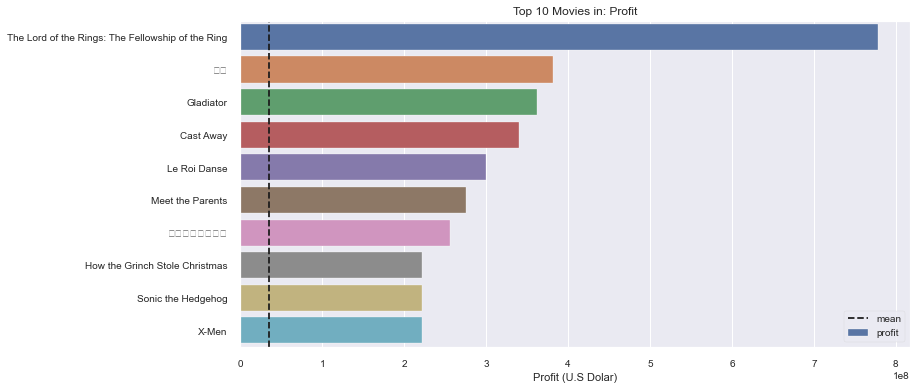

In [263]:
top_10('profit')


In [264]:
find_min_max('budget')


Movie which has highest budget :  Mulan
Movie which has lowest budget :  Manbaby Cries Because He Isn't Added to Discord Chat (Gone Wrong)


,31,514
title,Mulan,Manbaby Cries Because He Isn't Added to Discor...
genres,"[Adventure, Fantasy]",[War]
budget,200000000,1
popularity,332.695,0.6
production_companies,"[Walt Disney Pictures, China Film Group Corpor...",[Alwharf Studios]
production_countries,"[China, United States of America]",[]
revenue,57000000,99000000
runtime,115.0,34.0
status,Released,Released
vote_avg,7.1,10.0


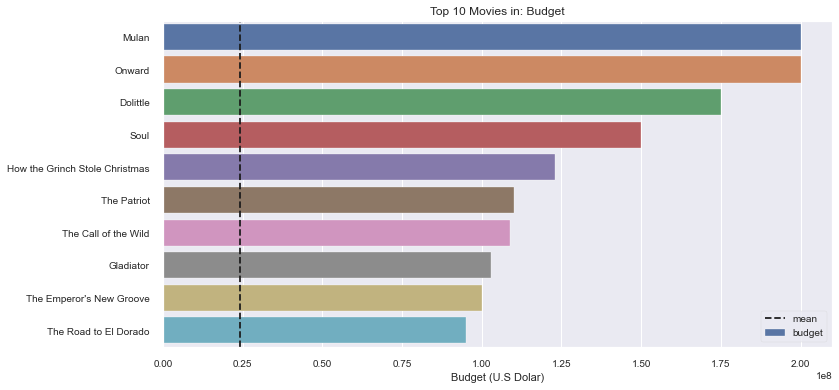

In [265]:
top_10('budget')


In [266]:
find_min_max('revenue')


Movie which has highest revenue :  The Lord of the Rings: The Fellowship of the Ring
Movie which has lowest revenue :  Rocky Horror Remade


,2588,563
title,The Lord of the Rings: The Fellowship of the Ring,Rocky Horror Remade
genres,"[Adventure, Fantasy, Action]","[Horror, Animation, Music, Comedy, Science Fic..."
budget,93000000,1
popularity,80.503,1.96
production_companies,"[New Line Cinema, WingNut Films, The Saul Zaen...",[The Player's Society]
production_countries,"[New Zealand, United States of America]",[United States of America]
revenue,871368364,1
runtime,179.0,95.0
status,Released,Released
vote_avg,8.3,10.0


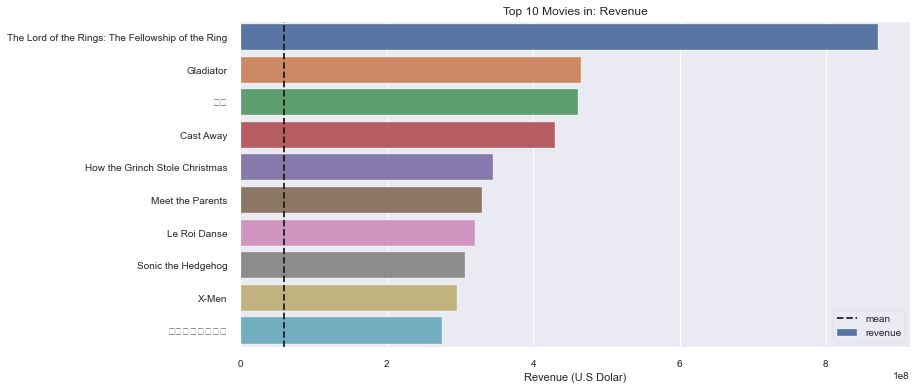

In [267]:
top_10('revenue')


In [268]:
find_min_max('runtime')


Movie which has highest runtime :  The Lord of the Rings: The Fellowship of the Ring
Movie which has lowest runtime :  Selfwatch


,2588,546
title,The Lord of the Rings: The Fellowship of the Ring,Selfwatch
genres,"[Adventure, Fantasy, Action]","[Horror, Thriller, Comedy]"
budget,93000000,10
popularity,80.503,0.742
production_companies,"[New Line Cinema, WingNut Films, The Saul Zaen...",[Pinto Grosso inc.]
production_countries,"[New Zealand, United States of America]",[]
revenue,871368364,5
runtime,179.0,0.0
status,Released,Released
vote_avg,8.3,10.0


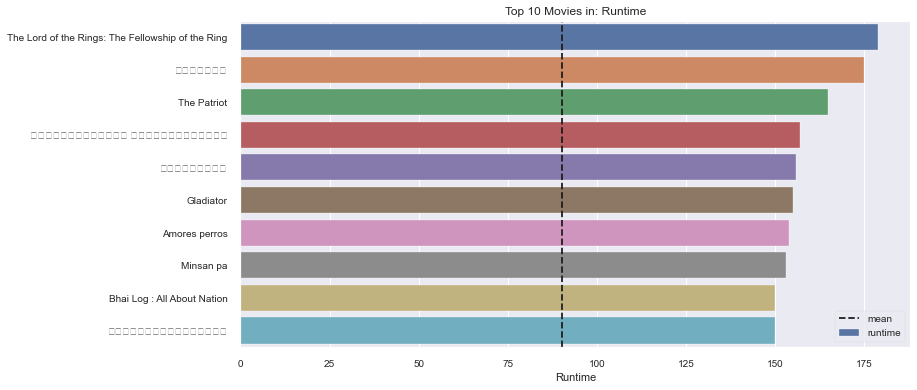

In [269]:
top_10('runtime')


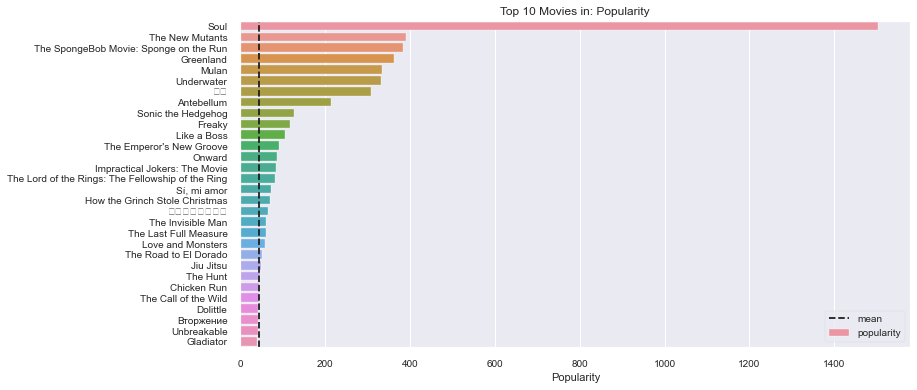

In [270]:
top_10('popularity', size=30)


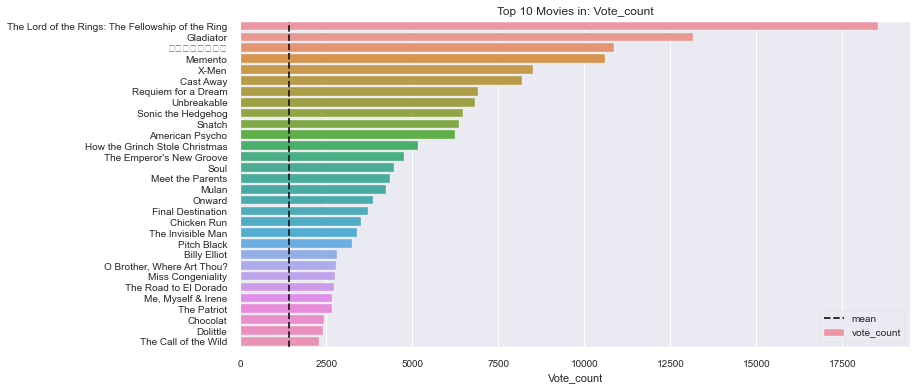

In [99]:
top_10('vote_count', size=30)


Text(0.5, 1.0, 'Total profit by month')

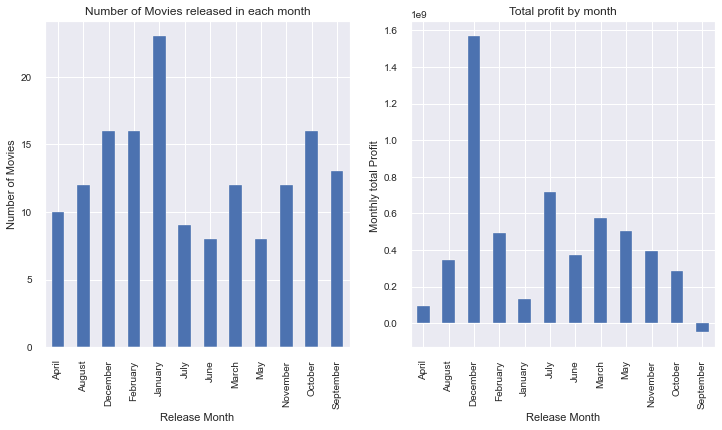

In [271]:
df_month = wholeData.copy()
df_month['release_month'] = df_month['release_date'].dt.strftime("%B")

fig = plt.figure(figsize=(12,6))
count_month = df_month.groupby('release_month')['profit'].count()
plt.subplot(1,2,1)
count_month.plot.bar()
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.title('Number of Movies released in each month')

plt.subplot(1,2,2)
sum_month = df_month.groupby('release_month')['profit'].sum()

sum_month.plot.bar()
plt.xlabel('Release Month')
plt.ylabel('Monthly total Profit ')
plt.title('Total profit by month')


In [272]:
df_related = wholeData[['profit','budget','revenue','runtime', 'vote_count','popularity']]


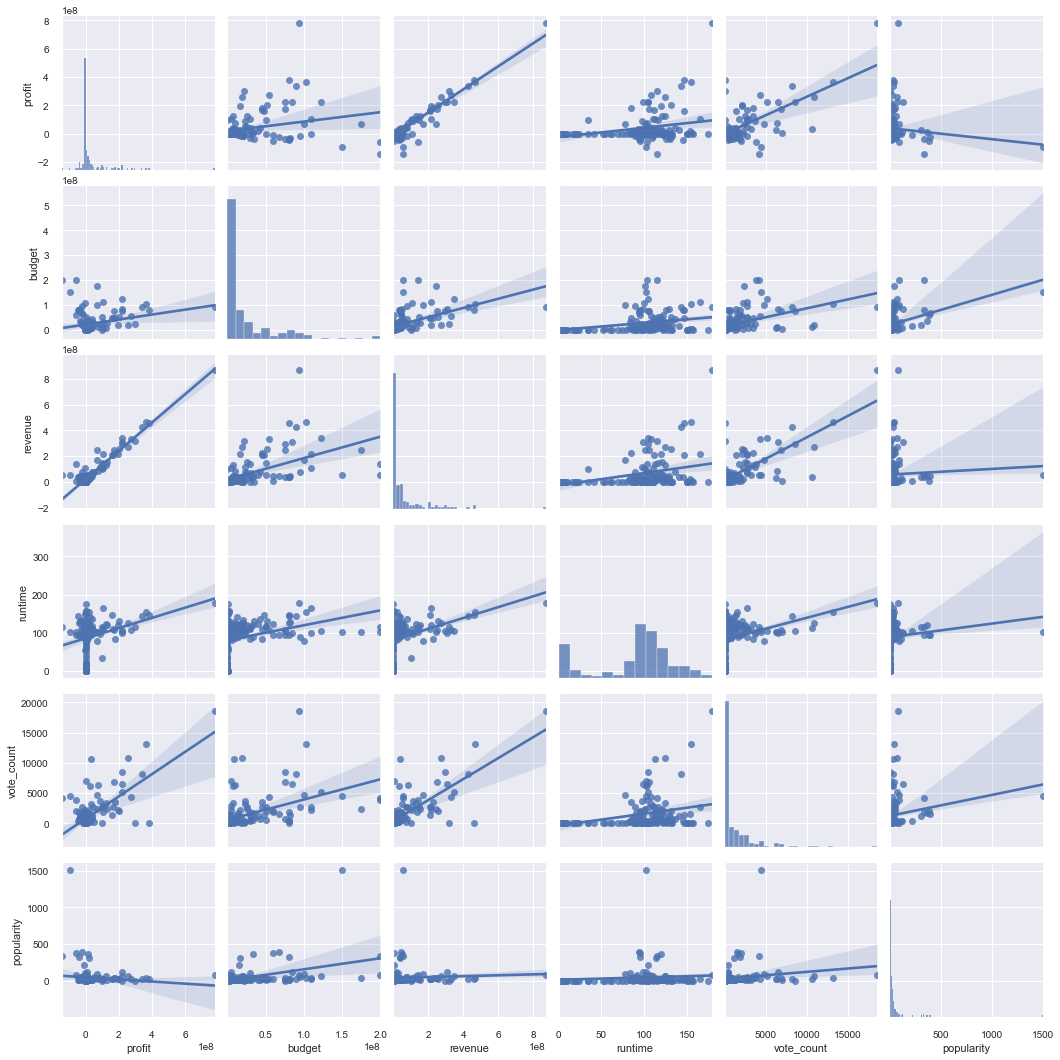

In [273]:
sns.pairplot(df_related, kind='reg')
#plt.savefig('correlation.png',bbox_inches='tight')



<AxesSubplot:xlabel='revenue', ylabel='budget'>

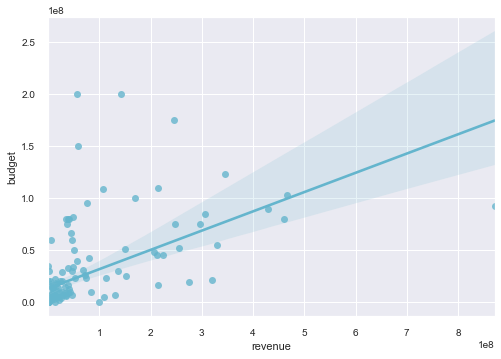

In [274]:
sns.regplot(x=wholeData['revenue'], y=wholeData['budget'],color='c')


In [275]:

def plot_correlation_map( wholeData ):
    corr = wholeData.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, 
                    annot = True, annot_kws = { 'fontsize' : 12 })

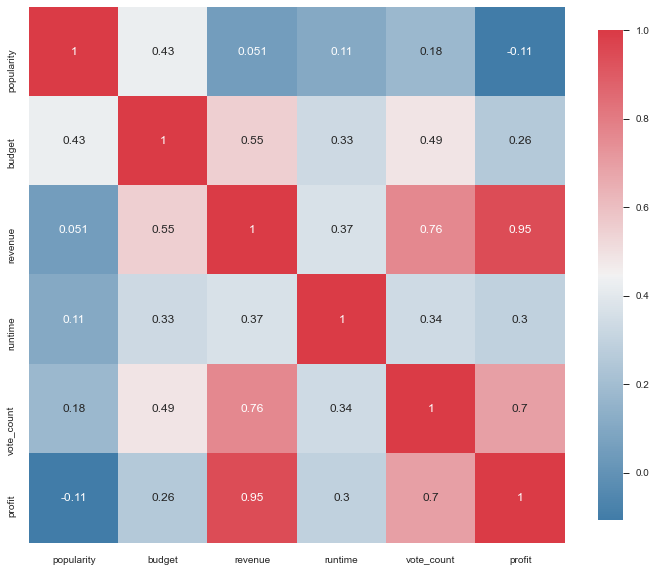

In [184]:
plot_correlation_map(wholeData[['popularity','budget','revenue','runtime','vote_count', 'profit']])


In [276]:
def split_count_data(col_name, size=15):
    ##function which will take any column as argument from which data is need to be extracted and keep track of count
    #take a given column, and separate the string by '|'
    wholeData[col_name] = wholeData[col_name].map(str).map(str.strip)
    data = wholeData[col_name].str.cat(sep='|')
    #storing the values separately in the series
    data = pd.Series(data.split('|'))
    #Let's count the most frequenties values for given column
    count = data.value_counts(ascending=False)
    count_size = count.head(size)
    #Setting axis name for multiple names
    if (col_name == 'production_companies'):
        sp = col_name.split('_')
        axis_name = sp[0].capitalize()+' '+ sp[1].capitalize()
    else:
        axis_name = col_name.capitalize()
    fig = plt.figure(figsize=(14, 6))
    #set the subplot 
    gs = gridspec.GridSpec(1,2, width_ratios=[2,2])
    #count of given column on the bar plot
    ax0 = plt.subplot(gs[0])
    count_size.plot.barh()
    plt.xlabel('Number of Movies')
    plt.ylabel(axis_name)
    plt.title('The Most '+str(size)+' Filmed ' +axis_name+' Versus Number of Movies')
    ax = plt.subplot(gs[1])
    #setting the explode to adjust the pei chart explode variable to any given size
    explode = []
    total = 0
    for i in range(size):
         total = total + 0.015
         explode.append(total)
    #pie chart for given size and given column
    ax = count_size.plot.pie(autopct='%1.2f%%', shadow=True, startangle=0, pctdistance=0.9, explode=explode)
    plt.title('The most '+str(size)+' Filmed ' +axis_name+ ' in Pie Chart')
    plt.xlabel('')
    plt.ylabel('')
    plt.axis('equal')
    plt.legend(loc=9, bbox_to_anchor=(1.4, 1))


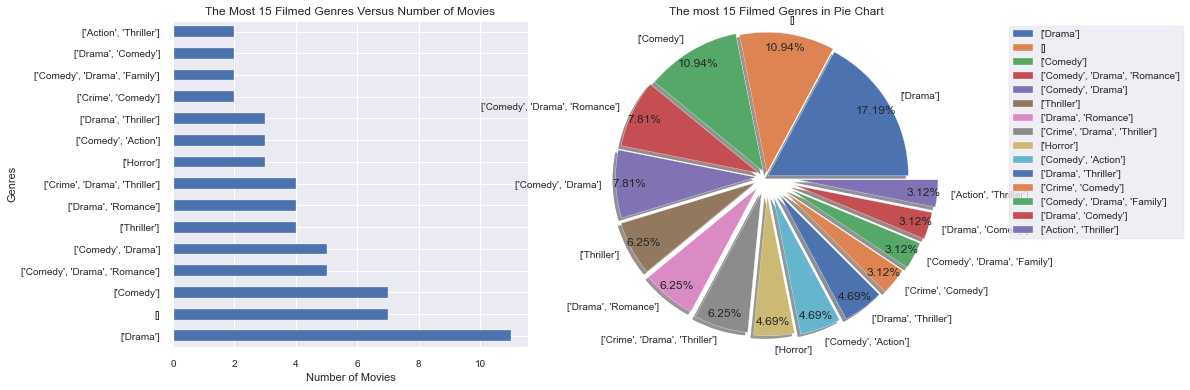

In [159]:
split_count_data('genres')
